In [40]:
# Import our dependencies
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [41]:
# Load Data From File
fitbit_train = pd.read_csv('Resources/train/train.csv')
fitbit_test = pd.read_csv('Resources/test/test.csv')

print(fitbit_train.shape, fitbit_test.shape)
fitbit_train.head(2)
#fitbit_test.head(2)

(7352, 563) (2947, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [42]:
# Making Training and Testing Data for model
X_train = fitbit_train.drop(['subject', 'Activity'], axis=1)
y_train = fitbit_train.Activity

X_test = fitbit_test.drop(['subject', 'Activity'], axis=1)
y_test = fitbit_test.Activity

print(f'X_train and y_train : ({X_train.shape},{y_train.shape})')
print(f'X_test  and y_test  : ({X_test.shape},{y_test.shape})')

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [43]:
# Labels for Confusion Matrix
labels = ["Laying", "Sitting", "Standing", "Walking", 
          "Walking_Down_Stairs", "Walking_Up_Stairs"]

In [44]:
# Make function to plot confusion matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        fmt = '.2f'  
    else:
        'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "blue")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
# Make function to run SVM model

def perform_model(svm, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # store results at various phases
    results = dict()
    
   # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    svm.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('--> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = svm.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('--> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   
    # calculate overall accuracty of model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    
    # store accuracy in results
    results['accuracy'] = accuracy
    print(f'Accuracy:- {accuracy}\n')
   
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n --------------Confusion Matrix--------------')
        print(f'\n {cm}')
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, 
                          title='Normalized confusion matrix', 
                          cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('------------------Classifiction Report------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = svm
    
    return results

training the model..
Done....!

--> training time:- 0:03:08.600757

Predicting test data
Done....!

--> testing time:- 0:00:01.210446

Accuracy:- 0.9626739056667798


 --------------Confusion Matrix--------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


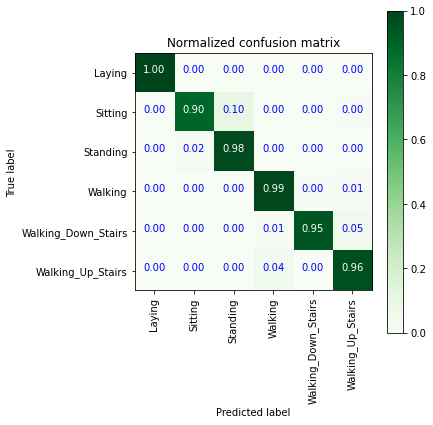

------------------Classifiction Report------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [47]:
# Return Results
rbf_svm_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)